# Proyecto Final
### Electromagnetismo
### Ricardo Holguin Esquer

#### Versión Julia

## Cargas puntuales
### Tarea 1

Una carga puntual es una carga eléctrica hipotética, de magnitud finita, contenida en un punto geométrico carente de toda dimensión, en otras palabras una carga puntual consiste en dos cuerpos con carga que son muy pequeños en comparación con la distancia que los separa. Esta suposición resulta muy práctica al resolver problemas de electrostática, pues los efectos derivados de una distribución de cargas en un espacio finito se anulan y el problema se simplifica enormemente. 

#### Librerias

In [1]:
import Plots
Plots.pyplot()

Plots.PyPlotBackend()

#### Jalar datos del archivo de texto

También inicializare las variables con los valores que jale del archivo

In [2]:
file = open("Datos.txt")
noCargas = parse(Int,readline(file))

cargas = Array{Float64}(undef, noCargas)
coordenadas = Array{Float64}(undef, noCargas, 2)
k = 9.0e9

for i=1:noCargas
    cargas[i] = parse(Float64,readline(file))
    coordenadas[i,1] = parse(Float64, readline(file))
    coordenadas[i,2] = parse(Float64, readline(file))
end
close(file)

#### Calcular las fuerzas de las cargas

In [3]:
fuerzaCargas = Matrix{Float64}(undef,noCargas,noCargas)

# Calcular las fuerzas de cada una carga con todas las demas
# Se guardaran en la diagonal superior derecha de una matriz
for i = 1:noCargas
    for j = i+1:noCargas
        radio = sqrt((coordenadas[j,1] - coordenadas[i,1])^2 + (coordenadas[j,2] - coordenadas[i,2])^2)
        fuerzaCargas[i,j] = abs(k*cargas[i]*cargas[j]/radio^2)
    end
end

display("text/plain", fuerzaCargas)

3×3 Array{Float64,2}:
 6.94036e-310  0.293023      0.2         
 6.94036e-310  6.94036e-310  0.149481    
 4.94066e-324  6.94036e-310  9.88131e-324

#### Calcular direcciones y su fuerza a ella

In [5]:
sumaFuerzasX = zeros(noCargas)
sumaFuerzasY = zeros(noCargas)
fuerzasTotales = zeros(noCargas)
angulosFuerza = zeros(noCargas)
for i = 1:noCargas
    # Primero se suman las columnas de la carga en la matriz de fuerzas
    for j = 1:noCargas
        # calcula el angulo de la carga i respecto a la carga j
        angulo = atan(coordenadas[j,2]-coordenadas[i,2], coordenadas[j,1]-coordenadas[i,1])

        if j < i
            # sumar fuerzas en el eje X
            if (coordenadas[i,1] > coordenadas[j,1] && cargas[i]*cargas[j] < 0) || (coordenadas[i,1] < coordenadas[j,1] && cargas[i]*cargas[j] > 0)
                sumaFuerzasX[i] -= fuerzaCargas[j,i]*abs(cos(angulo))
            elseif (coordenadas[i,1] > coordenadas[j,1] && cargas[i]*cargas[j] > 0) || (coordenadas[i,1] < coordenadas[j,1] && cargas[i]*cargas[j] < 0)
                sumaFuerzasX[i] += fuerzaCargas[j,i]*abs(cos(angulo))
            end
            # sumar fuerzas en el eje Y
            if (coordenadas[i,2] > coordenadas[j,2] && cargas[i]*cargas[j] < 0) || (coordenadas[i,2] < coordenadas[j,2] && cargas[i]*cargas[j] > 0)
                sumaFuerzasY[i] -= fuerzaCargas[j,i]*abs(sin(angulo))
            elseif (coordenadas[i,2] > coordenadas[j,2] && cargas[i]*cargas[j] > 0) || (coordenadas[i,2] < coordenadas[j,2] && cargas[i]*cargas[j] < 0)
                sumaFuerzasY[i] += fuerzaCargas[j,i]*abs(sin(angulo))
            end
        else
            break
        end
    end

    for j = i+1:noCargas
        angulo = atan(coordenadas[j,2]-coordenadas[i,2], coordenadas[j,1]-coordenadas[i,1])

        # Sumar fuerzas en el eje X
        if (coordenadas[i,1] > coordenadas[j,1] && cargas[i]*cargas[j] < 0) || (coordenadas[i,1] < coordenadas[j,1] && cargas[i]*cargas[j] > 0)
            sumaFuerzasX[i] -= fuerzaCargas[i,j]*abs(cos(angulo))
        elseif (coordenadas[i,1] > coordenadas[j,1] && cargas[i]*cargas[j] > 0) || (coordenadas[i,1] < coordenadas[j,1] && cargas[i]*cargas[j] < 0)
            sumaFuerzasX[i] += fuerzaCargas[i,j]*abs(cos(angulo))
        end

        #Sumar fuerzas en el eje Y
        if (coordenadas[i,2] > coordenadas[j,2] && cargas[i]*cargas[j] < 0) || (coordenadas[i,2] < coordenadas[j,2] && cargas[i]*cargas[j] > 0)
            sumaFuerzasY[i] -= fuerzaCargas[i,j]*abs(sin(angulo))
        elseif (coordenadas[i,] > coordenadas[j,2] && cargas[i]*cargas[j] > 0) || (coordenadas[i,2] < coordenadas[j,2] && cargas[i]*cargas[j] < 0)
            sumaFuerzasY[i] += fuerzaCargas[i,j]*abs(sin(angulo))
        end
    end

    fuerzasTotales[i] = sqrt(sumaFuerzasX[i]^2 + sumaFuerzasY[i]^2)
    angulosFuerza[i] = atand(sumaFuerzasY[i], sumaFuerzasX[i])
end

println("Fuerzas: ", fuerzasTotales)
#display("text/plain", fuerzasTotales)
println("Angulos de las direcciones: ", angulosFuerza)
#display("text/plain", angulosFuerza)
#println()

Fuerzas: [0.386349, 0.23403, 0.15232]
Angulos de las direcciones: [-97.1087, 82.8173, 83.0049]


#### Gráficar

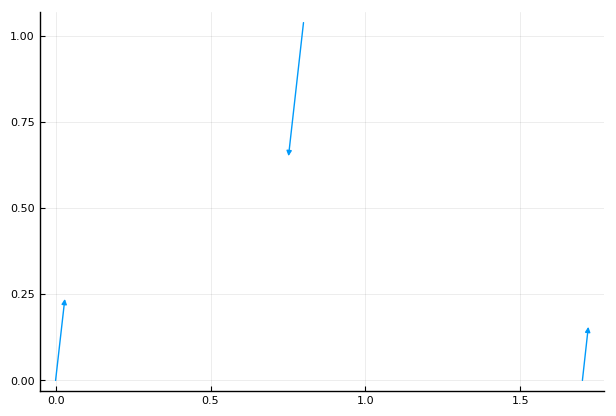

In [21]:
n = noCargas
y = coordenadas[:,2]
x = coordenadas[:,1]
vx, vy = sumaFuerzasX, sumaFuerzasY

fn = Plots.quiver(x,y, quiver=(vx,vy))
Plots.savefig("figure1")

## Dipolo
### Tarea 2

Las líneas de campo eléctrico para dos cargas puntuales de igual magnitud pero de signos opuestos son conocidas como dipolo eléctrico, es un sistema de dos cargas de signo opuesto e igual magnitud cercanas entre sí.

Los dipolos aparecen en cuerpos aislantes dieléctricos. A diferencia de lo que ocurre en los materiales conductores, en los aislantes los electrones no son libres. Al aplicar un campo eléctrico a un dieléctrico aislante éste se polariza dando lugar a que los dipolos eléctricos se reorienten en la dirección del campo disminuyendo la intensidad de éste. 

In [7]:
import PyPlot

In [18]:
function E(q, r0, x, y)
    """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
    den = hypot(x-r0[1], y-r0[2])^3
    return (q * (x - r0[1]) / den, q * (y - r0[2]) / den)
end

E (generic function with 1 method)

In [10]:
# Grid of x, y points
nx, ny = 64, 64
x = range(-2,stop=2, length=nx)
y = range(-2, stop=2, length=ny)
meshgrid(x, y) = (repeat(x, outer=length(y)), repeat(y, inner=length(x)))
X, Y = meshgrid(x,y)

([-2.0, -1.93651, -1.87302, -1.80952, -1.74603, -1.68254, -1.61905, -1.55556, -1.49206, -1.42857  …  1.42857, 1.49206, 1.55556, 1.61905, 1.68254, 1.74603, 1.80952, 1.87302, 1.93651, 2.0], [-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0  …  2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0])

In [13]:
# Create a multipole with nq charges of alternating sign, equally spaced
# on the unit circle.
nq = 2^1
charges = []
for i in range(0,stop=nq-1)
    q = i%2 * 2 - 1
    push!(charges,(q, (cos(2*π*i/nq), sin(2*π*i/nq))))
end

In [19]:
# Electric field vector, E=(Ex, Ey), as separate components
Ex, Ey = zeros((ny, nx)), zeros((ny, nx))
for charge in charges
    ex, ey = E(charge[1], charge[2], X, Y)
    Ex += ex
    Ey += ey
end

MethodError: MethodError: no method matching -(::Array{Float64,1}, ::Float64)
Closest candidates are:
  -(!Matched::Float64, ::Float64) at float.jl:397
  -(!Matched::Complex{Bool}, ::Real) at complex.jl:298
  -(!Matched::Missing, ::Number) at missing.jl:93
  ...

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the charges themselves
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in charges:
    print(pos)
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.show()